### Import data and libraries
### Data Wrangling
### Data Cleaning
### Plotting a Choropleth
### Result discussion

### Import libraries and data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
%matplotlib inline

In [3]:
# import data set
path = r'C:\Users\darii\Documents\12-2023 Airbnb Analysis'
data=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'data_clean.pkl'))

In [4]:
# import json data
geo = r'C:\Users\darii\Documents\12-2023 Airbnb Analysis\02 Data\Original Data\nyc2.geo.json'

In [5]:
# import json data
geo_bor = r'C:\Users\darii\Documents\12-2023 Airbnb Analysis\02 Data\Original Data\new-york-city-boroughs.geo.json'

In [6]:
# check json
f = open(r'C:\Users\darii\Documents\12-2023 Airbnb Analysis\02 Data\Original Data\nyc2.geo.json',)
  
json = json.load(f)

for i in json['features']:
    print(i)

{'type': 'Feature', 'properties': {'neighborhood': 'Allerton', 'boroughCode': '2', 'borough': 'Bronx', '@id': 'http://nyc.pediacities.com/Resource/Neighborhood/Allerton'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-73.84859700000018, 40.871670000000115], [-73.84582253683678, 40.870239076236174], [-73.85455918463374, 40.85995383576425], [-73.85466543306826, 40.859585694988056], [-73.85638870335896, 40.85759363530448], [-73.86888180915341, 40.857223150158326], [-73.86831755272824, 40.85786206225831], [-73.86955371467232, 40.85778409560018], [-73.87102485762065, 40.857309948816905], [-73.87048054998716, 40.865413584098484], [-73.87055489856489, 40.86970279858986], [-73.86721594442561, 40.86968966363671], [-73.85745, 40.86953300000018], [-73.85555000000011, 40.871813000000145], [-73.85359796757658, 40.8732883686742], [-73.84859700000018, 40.871670000000115]]]}}
{'type': 'Feature', 'properties': {'neighborhood': 'Alley Pond Park', 'boroughCode': '4', 'borough': 'Queens', '@id': 'htt

 ### Data Wrangling

In [7]:
# check the data
data.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         nan   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [8]:
# only columns needed
df = data [['neighbourhood_group', 'neighbourhood', 'price']]

In [9]:
# check
df.head(5)

neighbourhood_group neighbourhood  price
0            Brooklyn    Kensington    149
1           Manhattan       Midtown    225
2           Manhattan        Harlem    150
3            Brooklyn  Clinton Hill     89
4           Manhattan   East Harlem     80

### Data Cleaning

In [10]:
# missing values

df.isnull().sum()

neighbourhood_group    0
neighbourhood          0
price                  0
dtype: int64

##### no missing values

In [11]:
# duplicates check


##### done before on the entire data

C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\darii\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

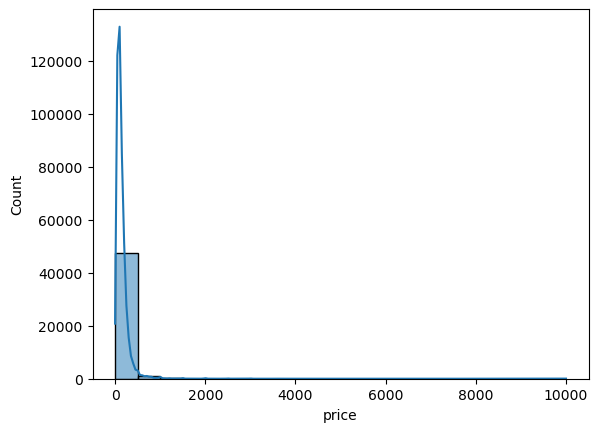

In [12]:
# extreme values check
sns.histplot(df['price'], bins=20, kde = True)

In [13]:
# check high values
df[df['price'] >1500]

neighbourhood_group       neighbourhood  price
496             Manhattan     Upper West Side   2000
946             Manhattan     Upper West Side   3000
1480            Manhattan     Upper West Side   2000
1862             Brooklyn    Prospect Heights   4000
2018            Manhattan        East Village   2500
...                   ...                 ...    ...
47869           Manhattan             Midtown   1600
48043           Manhattan             Tribeca   6500
48304           Manhattan      Hell's Kitchen   2999
48305           Manhattan     Upper East Side   1999
48535            Brooklyn  Bedford-Stuyvesant   1749

[139 rows x 3 columns]

##### as NYC has many luxury apartments whis data is not very surprising. Cross-check the full data set 

In [14]:
data[data['price'] >1500]

id                                            name    host_id  \
496      174966           Luxury 2Bed/2.5Bath Central Park View     836168   
946      363673                Beautiful 3 bedroom in Manhattan     256239   
1480     664047             Lux 2Bed/2.5Bath Central Park Views     836168   
1862     826690                Sunny, Family-Friendly 2 Bedroom    4289240   
2018     893413      Architecturally Stunning Former Synagogue!    4751930   
...         ...                                             ...        ...   
47869  35962668        Private Townhome in Midtown East near UN  270294045   
48043  36056808    Luxury TriBeCa Apartment at an amazing price  271248669   
48304  36189195   Next to Times Square/Javits/MSG! Amazing 1BR!  270214015   
48305  36189257          2BR Near Museum Mile! Upper East Side!  272166348   
48535  36311055  Stunning & Stylish Brooklyn Luxury, near Train  245712163   

         host_name neighbourhood_group       neighbourhood  latitude  \
496          Henry           Manhattan     Upper West Side  40.77350   
946         Tracey           Manhattan     Upper West Side  40.80142   
1480         Henry           Manhattan     Upper West Side  40.77516   
1862          Lucy            Brooklyn    Prospect Heights  40.67919   
2018        Martin           Manhattan        East Village  40.72668   
...            ...                 ...                 ...       ...   
47869    Christian           Manhattan             Midtown  40.75420   
48043        Jenny           Manhattan             Tribeca  40.71206   
48304      Rogelio           Manhattan      Hell's Kitchen  40.75533   
48305  Mary Rotsen           Manhattan     Upper East Side  40.78132   
48535      Urvashi            Brooklyn  Bedford-Stuyvesant  40.68245   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
496    -73.98697  Entire home/apt   2000              30                 30   
946    -73.96931     Private room   3000               7                  0   
1480   -73.98573  Entire home/apt   2000              30                 59   
1862   -73.97191  Entire home/apt   4000               4                  0   
2018   -73.98179  Entire home/apt   2500              30                 15   
...          ...              ...    ...             ...                ...   
47869  -73.96815  Entire home/apt   1600               3                  0   
48043  -74.00999  Entire home/apt   6500             180                  0   
48304  -73.99866  Entire home/apt   2999              30                  0   
48305  -73.95262  Entire home/apt   1999              30                  0   
48535  -73.93417  Entire home/apt   1749               1                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
496    2018-05-05               0.33                              11   
946           nan                NaN                               1   
1480   2016-01-28               0.71                              11   
1862          nan                NaN                               1   
2018   2019-07-01               0.26                               1   
...           ...                ...                             ...   
47869         nan                NaN                               1   
48043         nan                NaN                               1   
48304         nan                NaN                               1   
48305         nan                NaN                               1   
48535         nan                NaN                               1   

       availability_365  
496                   0  
946                 365  
1480                364  
1862                 83  
2018                 89  
...                 ...  
47869               365  
48043               365  
48304               222  
48305               270  
48535               303  

[139 rows x 16 columns]

##### from the discription and room type of this subset of expensive data it is understandable that could be 139 entries of luxury apartments for rent in the NYC

### Plotting a choropleth

In [15]:
# neighbourhood 
df_choropleth = df.groupby('neighbourhood')['price'].mean()
df_choropleth=pd.DataFrame({'neighbourhood':df_choropleth.index, 'price':df_choropleth.values})
state_data_indexed = df_choropleth.set_index('neighbourhood')
df_choropleth['price']=np.array(df_choropleth['price'], dtype=np.float64)
state_data_indexed['price']=np.array(state_data_indexed['price'], dtype=np.float64)

map = folium.Map(location=[40.62722339699969, -73.95915511046402], zoom_start=10, min_zoom=2, tiles='cartodbpositron')

cp=folium.Choropleth(
    geo_data = geo, 
    data = df_choropleth,
    columns = ['neighbourhood','price'],
    key_on = 'feature.properties.neighborhood', 
    fill_color = 'YlOrRd', fill_opacity=0.6, line_opacity=0.1, nan_fill_color = "gray",
    legend_name = "average price").add_to(map)

folium.LayerControl().add_to(map)

for s in cp.geojson.data['features']:
    if s['properties']['neighborhood'] in state_data_indexed.index:
        s['properties']['price']=state_data_indexed.loc[s['properties']['neighborhood'],'price']
    else:
        s['properties']['price']=0    

folium.GeoJsonTooltip(['neighborhood','price']).add_to(cp.geojson)

map

##### neighbourhoods differ in average rental prices. There are two very expensive neighbourhoods (not as expected in Manhatten) - this should be evaluated by having a look into number of apartments, not that these numbers are the result of a small sample. 

In [16]:
# save
map.save('map_neighbourhood.html')

In [17]:
# neighbourhood groups
df_choropleth = df.groupby('neighbourhood_group')['price'].mean()
df_choropleth=pd.DataFrame({'neighbourhood_group':df_choropleth.index, 'price':df_choropleth.values})
state_data_indexed = df_choropleth.set_index('neighbourhood_group')
df_choropleth['price']=np.array(df_choropleth['price'], dtype=np.float64)
state_data_indexed['price']=np.array(state_data_indexed['price'], dtype=np.float64)

map = folium.Map(location=[40.62722339699969, -73.95915511046402], zoom_start=10, min_zoom=2, tiles='cartodbpositron')

cp=folium.Choropleth(
    geo_data = geo_bor, 
    data = df_choropleth,
    columns = ['neighbourhood_group','price'],
    key_on = 'feature.properties.name', 
    fill_color = 'YlOrRd', fill_opacity=0.6, line_opacity=0.1, nan_fill_color = "gray",
    legend_name = "price").add_to(map)

folium.LayerControl().add_to(map)

for s in cp.geojson.data['features']:
    if s['properties']['name'] in state_data_indexed.index:
        s['properties']['price']=state_data_indexed.loc[s['properties']['name'],'price']
    else:
        s['properties']['price']=0    

folium.GeoJsonTooltip(['name','price']).add_to(cp.geojson)


map

##### analysing over bigger area (neighbourhood group) the average price are more balanced (less difference between max and min average prices) due to the bigger sample. Here the most expensive area is as expected Manhatten.

In [21]:
# save
map.save('map_neighbourhood_group.html')

### Result discussion

##### Price distribution per neighbourhood shows significant difference of prices depending of the geographical position of an apartment. Neighbourhood gets a chance to be the most powerfull price factor.

##### Further analysis would be the room-type distribution across neighbourhoods in order to analyse the price differences basen on both - area and size.